In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
cols=['TweetID', 'Topic', 'Target', 'Text']

train = pd.read_csv(r"C:\Users\ROSHAN\Downloads\archive (3)\twitter_training.csv", names = cols)

valid = pd.read_csv(r"C:\Users\ROSHAN\Downloads\archive (3)\twitter_validation.csv", names = cols)

In [3]:
train.head()

,TweetID,Topic,Target,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
valid.head()

,TweetID,Topic,Target,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [5]:
dataset = pd.concat([train, valid], ignore_index = False)
dataset.head()

,TweetID,Topic,Target,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
dataset.describe(include = 'object')

,Topic,Target,Text
count,75682,75682,74996
unique,32,4,69974
top,TomClancysRainbowSix,Negative,
freq,2435,22808,172


In [7]:
dataset['Topic'].value_counts()

TomClancysRainbowSix                 2435
LeagueOfLegends                      2431
MaddenNFL                            2429
Microsoft                            2428
CallOfDuty                           2425
Verizon                              2414
ApexLegends                          2412
Facebook                             2403
CallOfDutyBlackopsColdWar            2403
WorldOfCraft                         2394
Dota2                                2391
FIFA                                 2378
NBA2K                                2373
Battlefield                          2372
TomClancysGhostRecon                 2368
johnson&johnson                      2367
Overwatch                            2366
Xbox(Xseries)                        2360
Amazon                               2350
PlayStation5(PS5)                    2343
GrandTheftAuto(GTA)                  2339
CS-GO                                2336
Cyberpunk2077                        2334
Nvidia                            

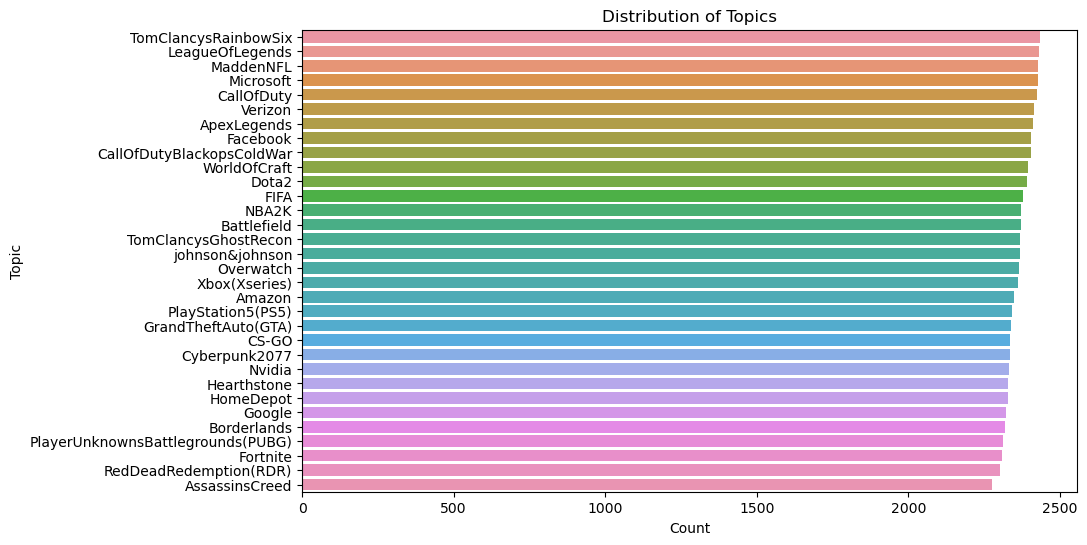

In [8]:
# Plot 1: Distribution of Topics
plt.figure(figsize=(10, 6))
sns.countplot(y='Topic', data=dataset, order=dataset['Topic'].value_counts().index)
plt.title('Distribution of Topics')
plt.xlabel('Count')
plt.ylabel('Topic')
plt.show()

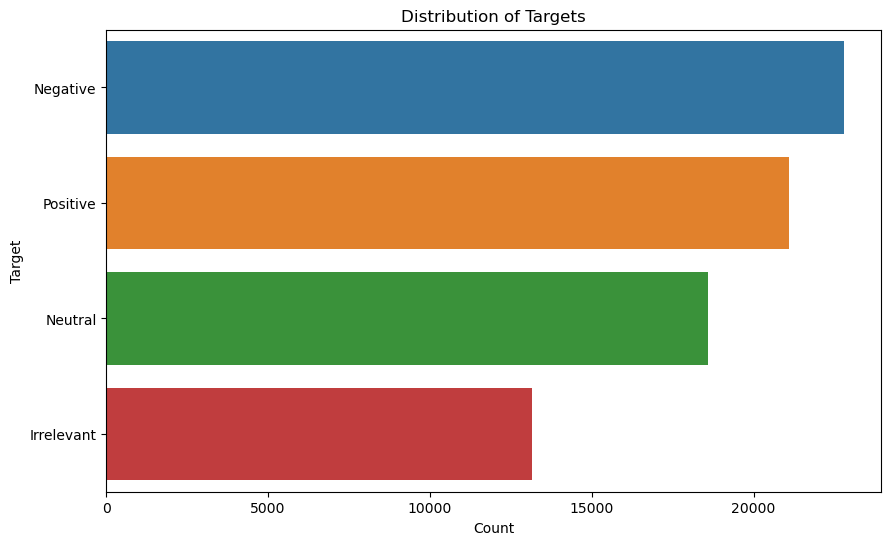

In [9]:
# Plot 2: Distribution of Targets
plt.figure(figsize=(10, 6))
sns.countplot(y='Target', data=dataset, order=dataset['Target'].value_counts().index)
plt.title('Distribution of Targets')
plt.xlabel('Count')
plt.ylabel('Target')
plt.show()

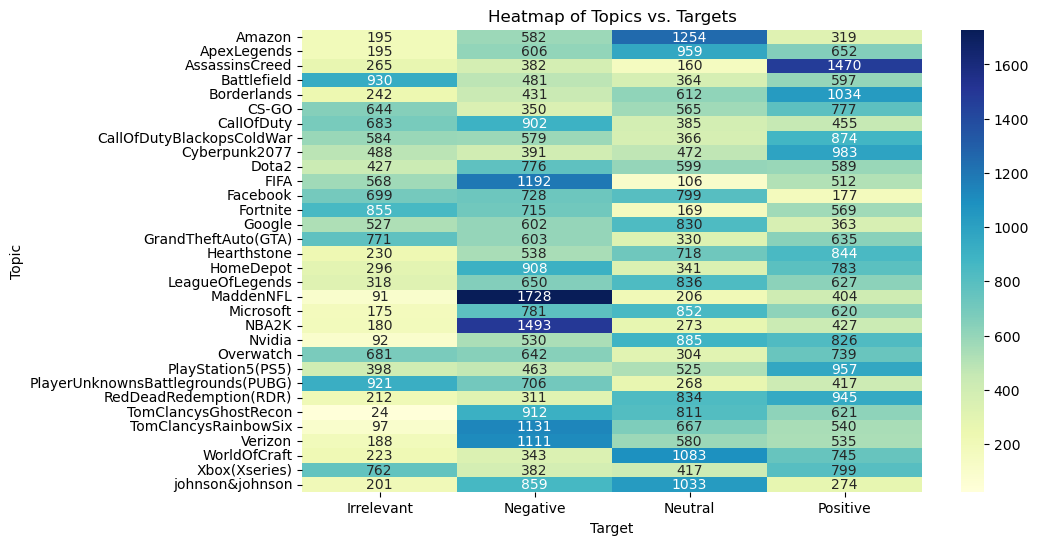

In [10]:
topic_target_pivot = dataset.pivot_table(index='Topic', columns='Target', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(topic_target_pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Topics vs. Targets')
plt.xlabel('Target')
plt.ylabel('Topic')
plt.show()

In [11]:
dataset.isna().sum()

TweetID      0
Topic        0
Target       0
Text       686
dtype: int64

In [12]:
dataset.duplicated().sum()

3217

In [13]:
dataset.dropna(inplace=True)
dataset.drop_duplicates(inplace=True)
dataset.isnull().sum()
dataset.duplicated().sum()

0

In [15]:
dataset['Topic'].values

array(['Borderlands', 'Borderlands', 'Borderlands', ..., 'CallOfDuty',
       'GrandTheftAuto(GTA)', 'CS-GO'], dtype=object)

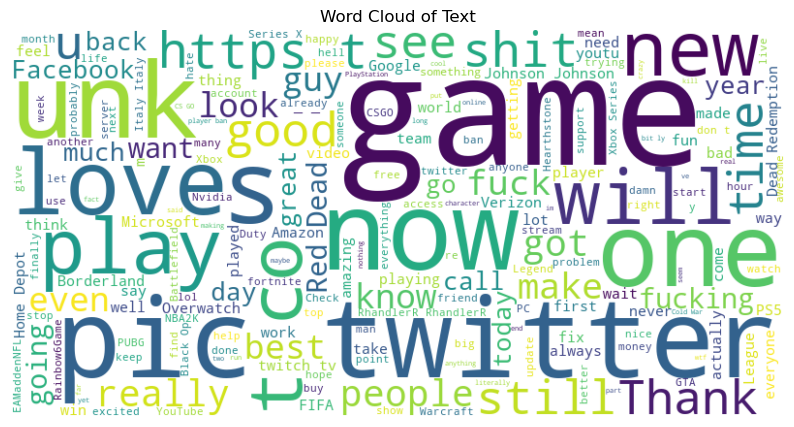

In [16]:
# Plot 4: Word Cloud of Text
# Ensure all text entries are strings and handle missing values
dataset['Text'] = dataset['Text'].astype(str).fillna('')

text_combined = ' '.join(dataset['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text')
plt.show()

In [17]:
import re

In [18]:
text = dataset['Text']
text.head()

0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
Name: Text, dtype: object

In [19]:
dataset['Text'] = dataset['Text'].astype(str)

In [20]:
l = []
text = dataset['Text']

for t in text:
    if type(t) not in l:
        l.append(type(t))
print(l)

[<class 'str'>]


In [21]:
!pip install nltk
from nltk.tokenize import word_tokenize

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ROSHAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
text[0], len(text), type(word_tokenize(text[0]))

('im getting on borderlands and i will murder you all ,', 72139, list)

In [24]:
import nltk
from nltk.corpus import stopwords
 
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ROSHAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
type(text[0])

str

In [26]:
from nltk.tokenize import word_tokenize

modified_text = []

rows = len(text)

for ithText in dataset['Text']:
    
    ithText = ithText.lower()  # Make text lowercase
    ithText = re.sub(r'[^\w\s]', '', ithText) # Remove punctuations and commas
    ithText = re.sub(r'\d+', '', ithText)
    
    
    tokens = word_tokenize(ithText)  # Extract tokens of each word
    words = set(stopwords.words('english'))
    doc = [word for word in tokens if word not in words]
    finalText = ' '.join(doc)
    modified_text.append(finalText)  # ith doc contents are tokenized and stored back

print(modified_text[1:3])

['coming borders kill', 'im getting borderlands kill']


In [27]:
dataset.drop('Text', axis =1 , inplace = True)
dataset.head()

,TweetID,Topic,Target
0,2401,Borderlands,Positive
1,2401,Borderlands,Positive
2,2401,Borderlands,Positive
3,2401,Borderlands,Positive
4,2401,Borderlands,Positive


In [28]:
dataset['Text'] = modified_text
dataset.head()

,TweetID,Topic,Target,Text
0,2401,Borderlands,Positive,im getting borderlands murder
1,2401,Borderlands,Positive,coming borders kill
2,2401,Borderlands,Positive,im getting borderlands kill
3,2401,Borderlands,Positive,im coming borderlands murder
4,2401,Borderlands,Positive,im getting borderlands murder


In [29]:
from sklearn.model_selection import train_test_split

X = dataset['Text'] 
y = dataset['Target'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)


y_pred = rf_classifier.predict(X_test_tfidf)


accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9017188799556418


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.96      0.83      0.89      2514
    Negative       0.93      0.92      0.92      4364
     Neutral       0.91      0.89      0.90      3594
    Positive       0.84      0.94      0.89      3956

    accuracy                           0.90     14428
   macro avg       0.91      0.89      0.90     14428
weighted avg       0.91      0.90      0.90     14428



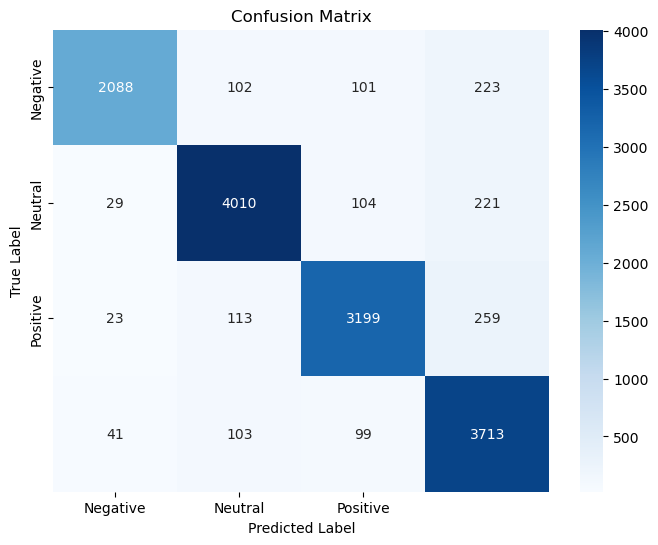

In [33]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()